In [8]:
import pandas as pd
import numpy as np
import sqlalchemy

from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import Column, Integer, String, Float

import pymysql
pymysql.install_as_MySQLdb()

In [15]:
engine = sqlalchemy.create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

base = automap_base()

In [41]:
#Precipitations Analysis

precip_df = pd.read_sql("SELECT date, prcp FROM measurements WHERE date > '2016-08-23'", conn)
precip_df = precip_df.set_index("date")

In [42]:
import matplotlib.pyplot as plt

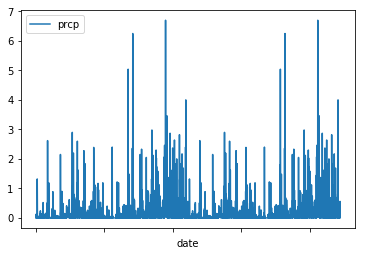

In [37]:
precip_df.plot()

In [40]:
print(precip_df.describe())

              prcp
count  4446.000000
mean      0.159951
std       0.441170
min       0.000000
25%       0.000000
50%       0.010000
75%       0.110000
max       6.700000


In [ ]:
#Station Analysis

'''
Design a query to calculate the total number of stations.

Design a query to find the most active stations.


List the stations and observation counts in descending order
Which station has the highest number of observations?



Design a query to retrieve the last 12 months of temperature observation data (tobs).


Filter by the station with the highest number of observations.
Plot the results as a histogram with bins=12.'''

In [55]:
#How many total stations? (it's 9, but here's how we know)

total_stations = engine.execute("SELECT COUNT(DISTINCT station) FROM stations")
total_stations.fetchone()

(9,)

In [80]:
#Most active stations (all time)? (Waihee with 5544, here's how we find that:)

active_stations = pd.read_sql("SELECT s.name, COUNT(m.tobs) AS station_obs FROM stations s JOIN measurements m ON s.station = m.station GROUP BY s.station ORDER BY station_obs DESC", conn)
active_stations

,name,station_obs
0,"WAIHEE 837.5, HI US",5544
1,"WAIKIKI 717.2, HI US",5448
2,"KANEOHE 838.1, HI US",5418
3,"WAIMANALO EXPERIMENTAL FARM, HI US",5338
4,"MANOA LYON ARBO 785.2, HI US",5224
5,"KUALOA RANCH HEADQUARTERS 886.9, HI US",4404
6,"HONOLULU OBSERVATORY 702.2, HI US",3958
7,"PEARL CITY, HI US",2744
8,"UPPER WAHIAWA 874.3, HI US",1022


In [85]:
#Temp observations from last 12 months, and using highest occuring (actually Waikiki when limited to last year)

waikiki_obs = pd.read_sql("SELECT s.name, m.tobs FROM stations s JOIN measurements m ON s.station = m.station WHERE m.date> '2016-08-23' AND name == 'WAIKIKI 717.2, HI US'", conn)
waikiki_obs

,name,tobs
0,"WAIKIKI 717.2, HI US",79
1,"WAIKIKI 717.2, HI US",79
2,"WAIKIKI 717.2, HI US",80
3,"WAIKIKI 717.2, HI US",80
4,"WAIKIKI 717.2, HI US",79
5,"WAIKIKI 717.2, HI US",79
6,"WAIKIKI 717.2, HI US",77
7,"WAIKIKI 717.2, HI US",77
8,"WAIKIKI 717.2, HI US",78
9,"WAIKIKI 717.2, HI US",78


Text(0.5,1,'temperature variation, waikiki')

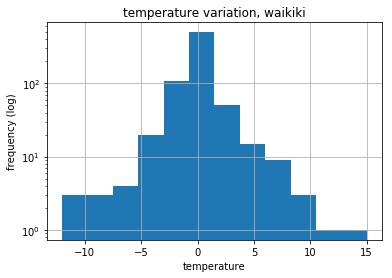

In [96]:
ax = waikiki_obs['tobs'].diff().hist(bins=12, log = True) #used log of frequency, otherwise 78-80 was just too dominant)
ax.set_xlabel('temperature')
ax.set_ylabel('frequency (log)')
ax.set_title("temperature variation, waikiki")

In [97]:
#Temperature Analysis

'''Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.
Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

Plot the min, avg, and max temperature from your previous query as a bar chart.


Use the average temperature as the bar height.
Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).'''

'Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.\nUse the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")\n\nPlot the min, avg, and max temperature from your previous query as a bar chart.\n\n\nUse the average temperature as the bar height.\nUse the peak-to-peak (tmax-tmin) value as the y error bar (yerr).'

In [111]:
start_date = input("Trip start date, YYYY-MM-DD")
end_date = input("Trip end date, YYYY-MM-DD")

date_list = [str(start_date), str(end_date)]

def calc_temps(date_list):
    start_date = date_list[0]
    end_date = date_list[1]
    trip_temp_df = pd.read_sql("SELECT tobs FROM measurements WHERE date > {} AND date < {}".format(start_date, end_date), conn)
    min_temp = trip_temp_df["tobs"].min()
    max_temp = trip_temp_df["tobs"].max()
    avg_temp = trip_temp_df["tobs"].mean()
    print("For that date range, expect between {} and {} degrees, averaging {}.".format(min_temp, max_temp, avg_temp))
    return(max_temp, min_temp, avg_temp)

(max_temp, min_temp, avg_temp) = calc_temps(date_list)

Trip start date, YYYY-MM-DD2016-06-05
Trip end date, YYYY-MM-DD2017-01-01
For that date range, expect between 53 and 87 degrees, averaging 72.6717073897497.


In [118]:
temp_df = {"max_temp":max_temp, "min_temp":min_temp, "avg_temp":avg_temp}
temp_plot_df = pd.DataFrame(temp_df, index = [0])

Text(0.5,1,'Trip Avg Temp')

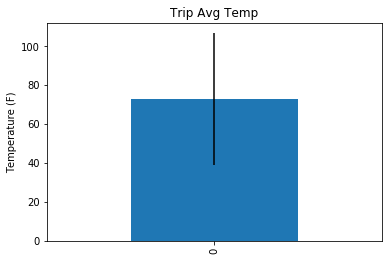

In [124]:
ax = temp_plot_df["avg_temp"].plot.bar(yerr = (temp_df["max_temp"] - temp_df["min_temp"]))
ax.set_xlabel('')
ax.set_ylabel('Temperature (F)')
ax.set_title("Trip Avg Temp")